In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score,RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [20]:
df=pd.read_csv('train.csv')
dt=pd.read_csv('test.csv')
df.describe()

,ID,RAdeg,DEdeg,Hclass,umag,gmag,rmag,imag,zmag,Ymag,...,i3mag,Z3mag,Y3mag,J3mag,H3mag,K3mag,Yhlr,Jhlr,Hhlr,Khlr
count,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,...,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000
mean,24326.761297,157.413606,-0.926899,0.927316,21.326973,19.904223,18.887562,18.323593,18.201334,18.022149,...,19.761906,18.653363,18.347970,18.157934,17.918551,17.825652,6.305703,79.624646,54.505159,35.399251
std,14038.295072,66.388946,2.411410,0.489506,2.345232,2.289705,2.024082,1.809982,1.721633,1.670744,...,1.452674,1.593221,1.491726,1.445090,1.369574,1.218845,1276.789991,5791.337827,3410.995424,2979.311817
min,1.000000,34.125470,-6.703610,0.000000,13.892700,12.227100,11.396600,10.969100,10.928600,11.072900,...,14.761300,13.642800,13.425000,13.477500,13.198100,13.105300,-99.000000,-99.000000,-99.000000,-99.000000
25%,12181.500000,134.743538,-2.492215,1.000000,19.420125,18.024200,17.272875,16.900425,16.835100,16.690250,...,18.748725,17.464400,17.226850,17.041725,16.863900,16.873950,0.647672,0.660015,0.668280,0.618118
50%,24300.000000,181.789490,-0.412005,1.000000,21.274150,19.840850,18.795950,18.309800,18.234400,18.070100,...,19.796850,18.682700,18.401000,18.208550,17.979500,17.902300,0.917700,0.869215,0.858840,0.816180
75%,36480.750000,209.603552,0.824670,1.000000,23.108600,21.820800,20.461875,19.658450,19.499125,19.253375,...,20.993350,19.773800,19.433475,19.182475,18.844775,18.628375,1.434217,1.287025,1.258892,1.193870
max,48685.000000,225.441880,3.021730,2.000000,33.162300,36.154200,25.110400,36.184800,23.480000,22.858900,...,24.570800,23.511900,22.461000,22.576200,24.343000,21.743800,134608.831100,668970.396270,427925.236530,435077.487900


In [21]:
#Observamos que las ultimas 4 columnas tienen valores invalidos lo que puede generar problemas al modelo de entrenamiento
#remplazamos cada valor referido a esto
df.replace(-99,np.nan,inplace=True) #La función replace() es un método de Pandas que permite reemplazar valores específicos en un DataFrame o en una Serie.
#Ademas puede haber valores faltantes por lo que completamos eñ codigo con estos valores tomando la mediana de cada columna
df.fillna(df.median(),inplace=True) #es un método de Pandas que se utiliza para reemplazar los valores faltantes (NaN) en un DataFrame

In [22]:
#Observamos que las ultimas 4 columnas tienen valores invalidos lo que puede generar problemas al modelo de entrenamiento
#remplazamos cada valor referido a esto
dt.replace(-99,np.nan,inplace=True)
#Ademas puede haber valores faltantes por lo que completamos eñ codigo con estos valores tomando la mediana de cada columna
dt.fillna(dt.mean(),inplace=True)
#Repito lo de arriba pues si entreno testeo

In [23]:
df.set_index('ID',inplace=True)
dt.set_index('ID',inplace=True )

In [24]:
df.describe()
#Observemos que la tabla cambio

,RAdeg,DEdeg,Hclass,umag,gmag,rmag,imag,zmag,Ymag,Jmag,...,i3mag,Z3mag,Y3mag,J3mag,H3mag,K3mag,Yhlr,Jhlr,Hhlr,Khlr
count,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,...,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000
mean,157.413606,-0.926899,0.927316,21.326973,19.904223,18.887562,18.323593,18.201334,18.022149,17.879179,...,19.761906,18.653363,18.347970,18.157934,17.918551,17.825652,16.962571,83.169851,55.410412,38.474975
std,66.388946,2.411410,0.489506,2.345232,2.289705,2.024082,1.809982,1.721633,1.670744,1.618812,...,1.452674,1.593221,1.491726,1.445090,1.369574,1.218845,1276.283707,5791.257965,3410.967815,2979.223007
min,34.125470,-6.703610,0.000000,13.892700,12.227100,11.396600,10.969100,10.928600,11.072900,10.924400,...,14.761300,13.642800,13.425000,13.477500,13.198100,13.105300,0.341090,0.232720,0.272110,0.305210
25%,134.743538,-2.492215,1.000000,19.420125,18.024200,17.272875,16.900425,16.835100,16.690250,16.583500,...,18.748725,17.464400,17.226850,17.041725,16.863900,16.873950,0.768485,0.695113,0.676702,0.645580
50%,181.789490,-0.412005,1.000000,21.274150,19.840850,18.795950,18.309800,18.234400,18.070100,17.925500,...,19.796850,18.682700,18.401000,18.208550,17.979500,17.902300,0.980705,0.883985,0.862190,0.828440
75%,209.603552,0.824670,1.000000,23.108600,21.820800,20.461875,19.658450,19.499125,19.253375,19.047475,...,20.993350,19.773800,19.433475,19.182475,18.844775,18.628375,1.434217,1.287025,1.258892,1.193870
max,225.441880,3.021730,2.000000,33.162300,36.154200,25.110400,36.184800,23.480000,22.858900,22.670500,...,24.570800,23.511900,22.461000,22.576200,24.343000,21.743800,134608.831100,668970.396270,427925.236530,435077.487900


In [25]:
#Ahora, como queremos que diferencie entre estrella, galaxia o cuasar, utilizamos las magnitudes
Bandas=['umag','gmag','rmag','imag','zmag','Ymag','Jmag','Hmag','Kmag','W1mag','W2mag'] #Estas solas magnitudes totales
#Elegimos en principio estas bandas 
#La función len() devuelve la cantidad de elementos en una lista
for i in range(len(Bandas)-1):
    df[f'{Bandas[i]}-{Bandas[i+1]}']=df[Bandas[i]]-df[Bandas[i+1]]
    dt[f'{Bandas[i]}-{Bandas[i+1]}']=dt[Bandas[i]]-dt[Bandas[i+1]]
Bandas_rad=['u3mag','g3mag','r3mag','i3mag','Z3mag','Y3mag','J3mag','H3mag','K3mag']
#Ahora en la misma linea de codigo, haremos lo mismo para las magnitudes a radio constante 3arcsecond
for i in range(len(Bandas_rad)-1):
    df[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=df[Bandas_rad[i]]-df[Bandas_rad[i+1]]
    dt[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=dt[Bandas_rad[i]]-dt[Bandas_rad[i+1]]
Bandas_HLR=['Yhlr','Jhlr','Hhlr','Khlr']
for i in range(len(Bandas_HLR)-1):
    df[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=df[Bandas_HLR[i]]-df[Bandas_HLR[i+1]]
    dt[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=dt[Bandas_HLR[i]]-dt[Bandas_HLR[i+1]]
df['W1mag/W2mag'] = df['W1mag'] / df['W2mag']
df['umag/gmag'] = df['umag'] / df['gmag']
df['gmag/rmag'] = df['gmag'] / df['rmag']
df['rmag/imag'] = df['rmag'] / df['imag']
df['Hmag/Kmag'] = df['Hmag'] / df['Kmag']
df['Jmag/Hmag'] = df['Jmag'] / df['Hmag']
dt['W1mag/W2mag'] = dt['W1mag'] / dt['W2mag']
dt['umag/gmag'] = dt['umag'] / dt['gmag']
dt['gmag/rmag'] = dt['gmag'] / dt['rmag']
dt['rmag/imag'] = dt['rmag'] / dt['imag']
dt['Hmag/Kmag'] = dt['Hmag'] / dt['Kmag']
dt['Jmag/Hmag'] = dt['Jmag'] / dt['Hmag']

In [26]:
df.describe()
#Observemos que la tabla cambio

,RAdeg,DEdeg,Hclass,umag,gmag,rmag,imag,zmag,Ymag,Jmag,...,H3mag-K3mag,Yhlr-Jhlr,Jhlr-Hhlr,Hhlr-Khlr,W1mag/W2mag,umag/gmag,gmag/rmag,rmag/imag,Hmag/Kmag,Jmag/Hmag
count,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,...,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000
mean,157.413606,-0.926899,0.927316,21.326973,19.904223,18.887562,18.323593,18.201334,18.022149,17.879179,...,0.092899,-66.207280,27.759440,16.935437,0.977691,1.072980,1.053226,1.030055,1.004627,1.012450
std,66.388946,2.411410,0.489506,2.345232,2.289705,2.024082,1.809982,1.721633,1.670744,1.618812,...,0.282443,5858.671382,4836.687351,3897.045577,0.018192,0.043109,0.027294,0.018004,0.017121,0.013607
min,34.125470,-6.703610,0.000000,13.892700,12.227100,11.396600,10.969100,10.928600,11.072900,10.924400,...,-2.527300,-668950.260310,-293999.769970,-435067.990910,0.890621,0.607373,0.934201,0.489830,0.864715,0.834118
25%,134.743538,-2.492215,1.000000,19.420125,18.024200,17.272875,16.900425,16.835100,16.690250,16.583500,...,-0.067575,0.045600,-0.027410,-0.001640,0.967405,1.042797,1.033468,1.019117,0.994225,1.006415
50%,181.789490,-0.412005,1.000000,21.274150,19.840850,18.795950,18.309800,18.234400,18.070100,17.925500,...,0.173250,0.100710,0.026965,0.041420,0.974748,1.072225,1.054657,1.027765,1.008448,1.013750
75%,209.603552,0.824670,1.000000,23.108600,21.820800,20.461875,19.658450,19.499125,19.253375,19.047475,...,0.287200,0.178067,0.082402,0.092675,0.981492,1.100513,1.073618,1.041965,1.016377,1.019651
max,225.441880,3.021730,2.000000,33.162300,36.154200,25.110400,36.184800,23.480000,22.858900,22.670500,...,3.882700,113645.904560,597012.934340,293999.882070,1.088578,1.599609,1.841849,1.198456,1.171118,1.337453


In [27]:
dt.describe()

,RAdeg,DEdeg,umag,gmag,rmag,imag,zmag,Ymag,Jmag,Hmag,...,H3mag-K3mag,Yhlr-Jhlr,Jhlr-Hhlr,Hhlr-Khlr,W1mag/W2mag,umag/gmag,gmag/rmag,rmag/imag,Hmag/Kmag,Jmag/Hmag
count,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,...,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000
mean,156.613149,-0.941329,21.333312,19.913324,18.893525,18.327183,18.208126,18.026394,17.881192,17.659919,...,0.096717,-32.381068,43.785587,25.100636,0.977514,1.072817,1.053366,1.030131,1.004819,1.012373
std,66.636595,2.417208,2.355041,2.302595,2.033262,1.810993,1.725643,1.675016,1.618450,1.549947,...,0.282231,5736.574701,5665.523620,1986.690642,0.018299,0.042910,0.027836,0.017916,0.017155,0.013767
min,34.123260,-6.700990,13.861100,12.374600,11.549300,11.126800,11.208200,11.035000,10.942100,10.770100,...,-1.700100,-538107.595710,-141839.883470,-48477.840710,0.920631,0.577041,0.941978,0.804430,0.895952,0.875937
25%,134.302335,-2.524500,19.424800,18.030150,17.282600,16.900775,16.844400,16.705425,16.596125,16.427375,...,-0.061700,0.042350,-0.025678,-0.004732,0.967268,1.042811,1.033624,1.019093,0.994505,1.006117
50%,181.503560,-0.412735,21.304150,19.871000,18.812250,18.338150,18.252150,18.078800,17.940700,17.737750,...,0.177400,0.107510,0.031385,0.041280,0.974650,1.072000,1.054756,1.027876,1.008780,1.013790
75%,208.548822,0.809577,23.142750,21.828300,20.471850,19.660875,19.498025,19.268400,19.047425,18.729200,...,0.289600,0.198440,0.090515,0.093400,0.981540,1.099816,1.073481,1.042055,1.016554,1.019723
max,225.442140,3.019600,30.413400,36.653700,24.895600,23.483300,23.368500,22.731200,22.694700,22.810600,...,2.481100,158547.391360,538108.915410,141842.119430,1.081902,1.569999,1.977924,1.174576,1.173148,1.121660


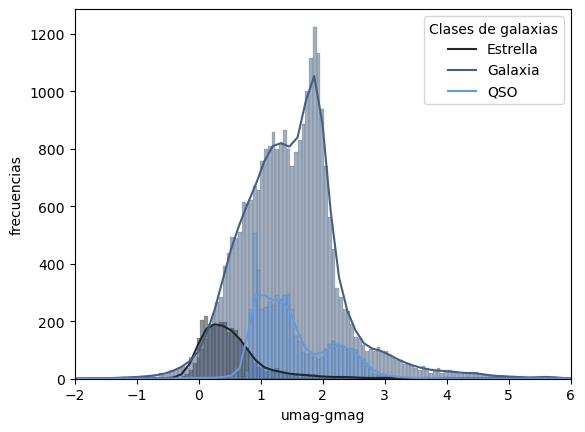

In [28]:
palette=sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.histplot(df, x='umag-gmag', hue='Hclass', kde=True, palette=palette)  
plt.xlim(-2,6)
plt.ylabel('frecuencias')

plt.legend(title='Clases de galaxias', labels=['Estrella', 'Galaxia', 'QSO'])
plt.show()

In [29]:
df['Hclass'].value_counts()

Hclass
1    27572
0     5798
2     3144
Name: count, dtype: int64

In [30]:
#Tengo que definir mis feature, mis variables de entrada, estas son las que utilizamos para entrenar el modelo
features = ['umag', 'gmag', 'rmag', 'imag', 'zmag', 'Ymag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 
            'umag-gmag', 'gmag-rmag', 'rmag-imag', 'imag-zmag', 'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 
            'Hmag-Kmag', 'W1mag-W2mag', 'g3mag-r3mag', 'r3mag-i3mag', 
            'i3mag-Z3mag', 'Z3mag-Y3mag', 'Y3mag-J3mag', 'J3mag-H3mag', 'H3mag-K3mag','W1mag/W2mag', 'umag/gmag', 'gmag/rmag', 'rmag/imag', 'Hmag/Kmag', 'Jmag/Hmag']
#Me quedo con mis mejores estimadores
#features = [
#            'umag-gmag', 'gmag-rmag', 'rmag-imag', 'Ymag-Jmag', 'Jmag-Hmag', 
#            'Hmag-Kmag', 'W1mag-W2mag', 'g3mag-r3mag', 'r3mag-i3mag',
#             'Z3mag-Y3mag', 'Y3mag-J3mag', 'J3mag-H3mag', 'H3mag-K3mag']

In [31]:
df_tr, df_te=train_test_split(df,test_size=0.3,random_state=42)
#Divide el conjunto de datos en entrenamiento (70%) y prueba (30%)

In [32]:
#Ahora dividimos en clases de entrenamiento
X_train = df_tr[features]
y_train = df_tr['Hclass']

#lo mismo con el testeo
X_test=df_te[features]
y_test=df_te['Hclass']

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)  # Se puede ajustar el parámetro k
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.98


In [36]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1661   56    5]
 [  34 8226   43]
 [   0  100  830]]


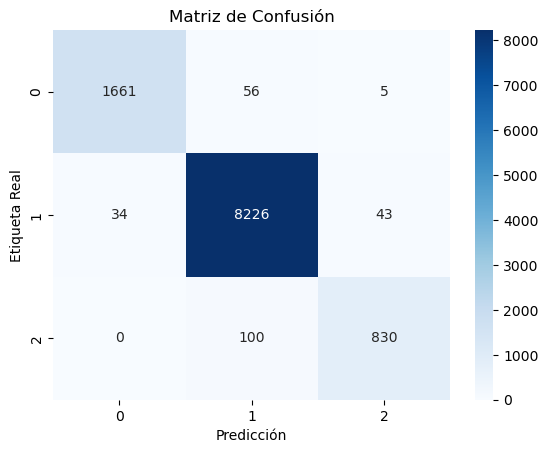

In [37]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()

In [40]:
y_pred=knn.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.9780965728358006